In [1]:
# -*- coding: utf-8 -*-
#  Copyright 2021 - 2024 United Kingdom Research and Innovation
#  Copyright 2021 - 2024 The University of Manchester
#
#  Licensed under the Apache License, Version 2.0 (the "License");
#  you may not use this file except in compliance with the License.
#  You may obtain a copy of the License at
#
#      http://www.apache.org/licenses/LICENSE-2.0
#
#  Unless required by applicable law or agreed to in writing, software
#  distributed under the License is distributed on an "AS IS" BASIS,
#  WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
#  See the License for the specific language governing permissions and
#  limitations under the License.
#
#   Authored by:    Mariam Demir (UKRI-STFC)

### Normalise Data Using Flat and Dark Field Projections
##### This example shows how to use the `Normaliser` processor to perform flat and dark field corrections on projections

In [4]:
from cil.io import TIFFStackReader
from cil.framework import AcquisitionGeometry, AcquisitionData
from cil.processors import Normaliser
from cil.utilities import dataexample
from cil.utilities.display import show_geometry
from cil.utilities.display import show2D
import numpy as np
import os

In a previous How-To (*CIL-Demos/how-to/1_Read_and_visualise/TIFFStackReader*), we showed how to load the `sandstone` dataset from .tif files.  
Shown below is a central slice from this dataset - Notice the horizontal lines running through the image, as well as the pixel intensities (right) are not within 0 and 1.

This is data that needs flat and dark field correcting. In this How-To, we will be using the `Normaliser` processor.

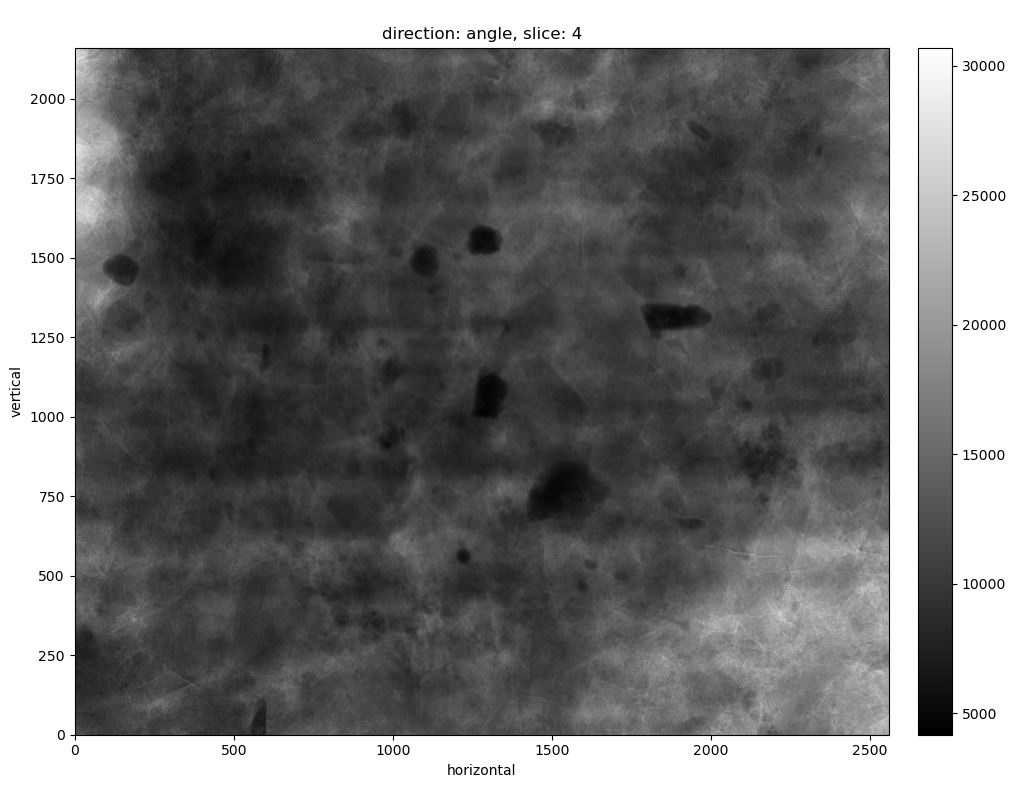

In [7]:
%store -r sandstone
show2D(sandstone)

First, load the dark and flat field projections separately. We create a list of paths to the known dark and flat field files:

In [8]:
datapath = 'sandstone/proj'

darkfiles = ["BBii_0001.tif", "BBii_0002.tif"]
flatfiles = ["BBii_0031.tif", "BBii_0032.tif", "BBii_1632.tif", "BBii_1633.tif"]

darkfiles = [os.path.join(datapath, file) for file in darkfiles]
flatfiles = [os.path.join(datapath, file) for file in flatfiles]

The `TIFFStackReader` is used to read in the file data:

In [9]:
tiff_reader = TIFFStackReader(file_name=flatfiles)
flat = tiff_reader.read()

tiff_reader = TIFFStackReader(file_name=darkfiles)
dark = tiff_reader.read()

Now we can take a look at a slice from the dark and flat field projections:

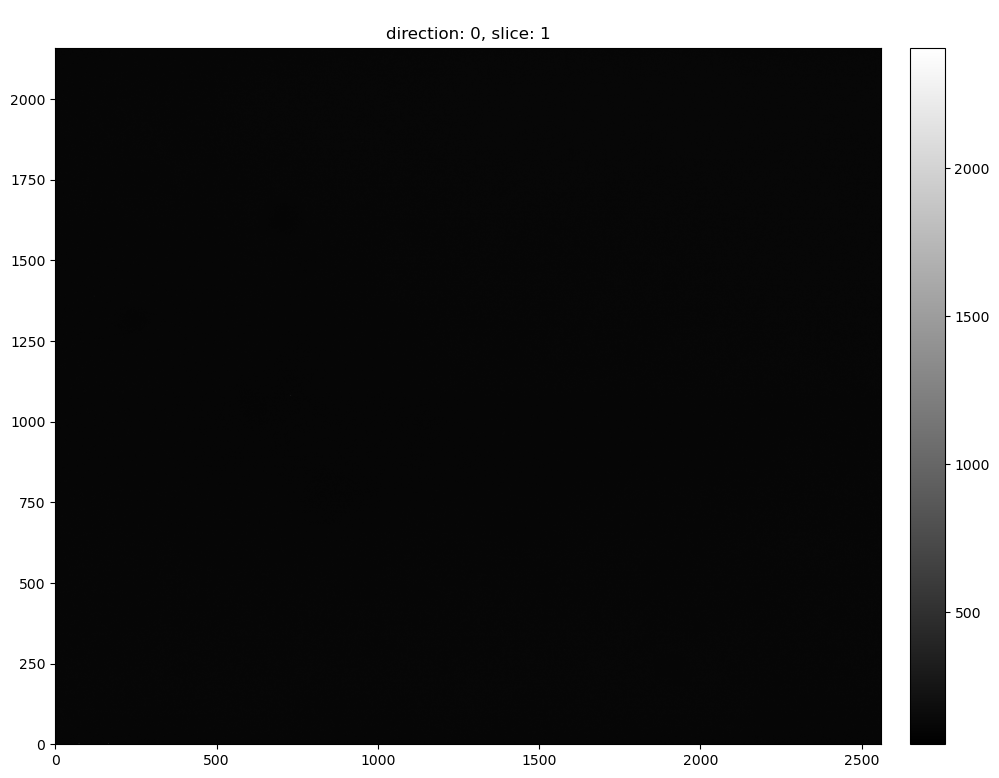

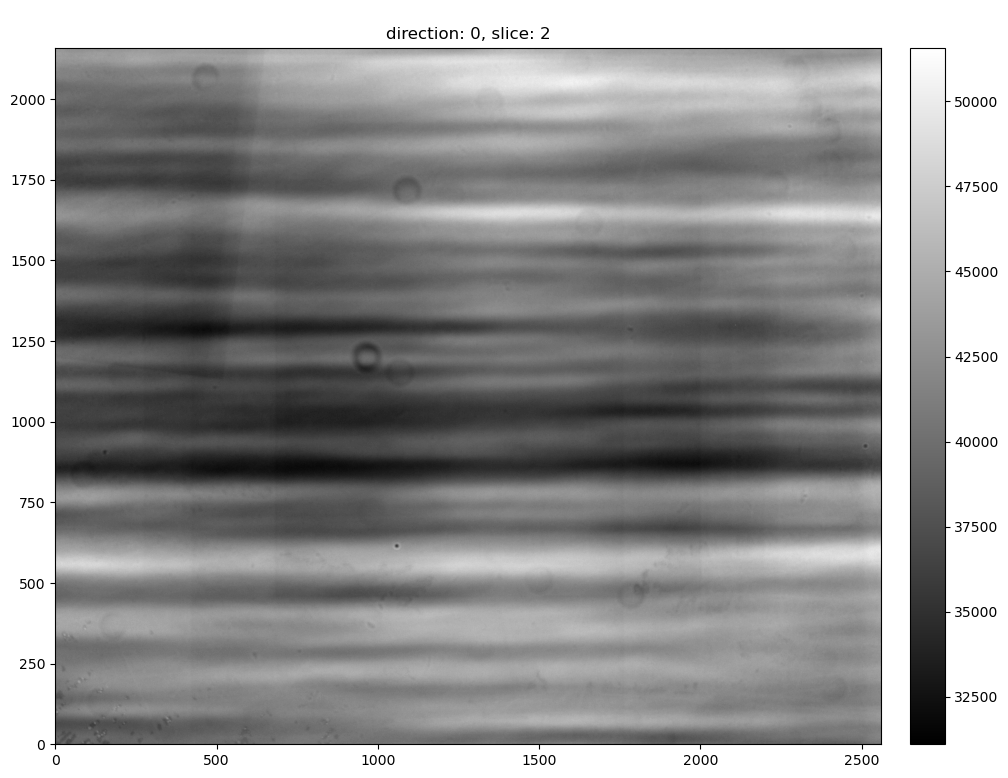

In [14]:
show2D(dark)
show2D(flat)

We can now use the `Normaliser` processor on the `sandstone` dataset.  
We compute a mean of pixel intensities from the `flat` and `dark` projections, which are passed as `flat_field` and `dark_field`.

In [12]:
norm = Normaliser(flat_field=np.mean(flat, axis=0),
                   dark_field=np.mean(dark, axis=0))
norm.set_input(dataset=sandstone)

sandstone_norm = norm.get_output()

Below we can see a comparison of the raw `sandstone` dataset vs. the normalised `sandstone_norm` data:

The pixel intensities are between 0 and 1, and the horizontal lines have been corrected

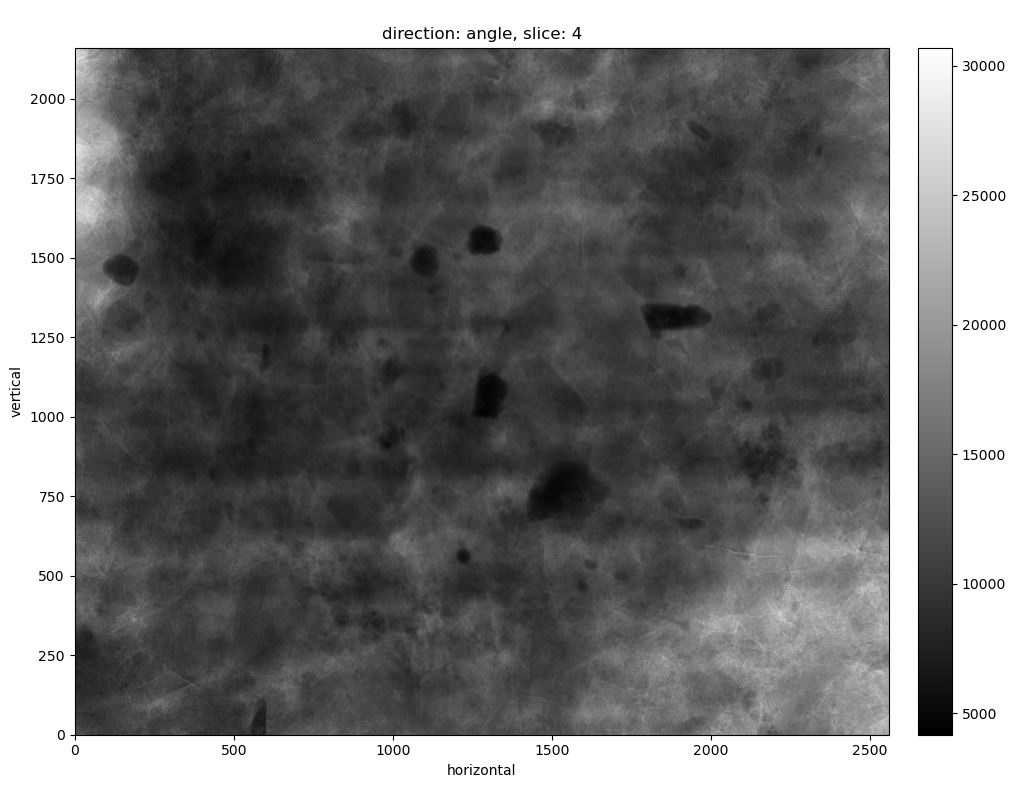

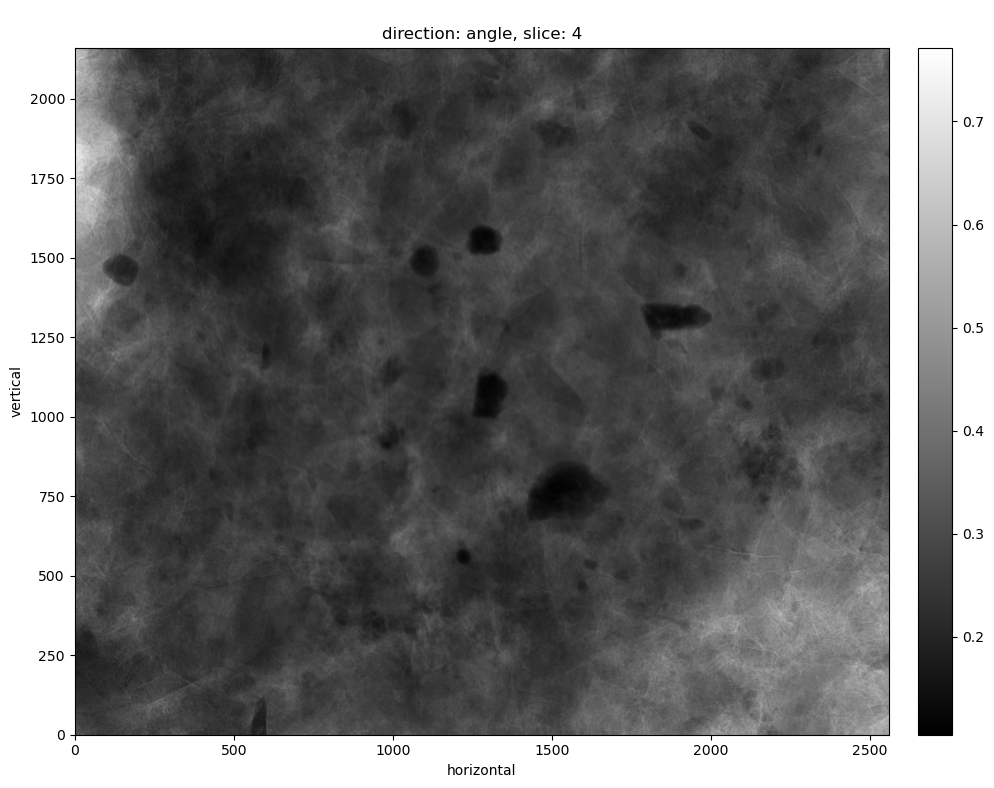

In [13]:
show2D(sandstone)
show2D(sandstone_norm)